In [13]:
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import LRGBDataset
import torch.nn.functional as F
from argparse import ArgumentParser
import torch
from myModels.ourModels import NodeIterativeGNN
from myModels.OtherLayers import VOCNodeEncoder, GNNInductiveNodeHead
from myModels.utils import make_uniform_schedule
from main.train import eval_lrgb

In [12]:
encoder = VOCNodeEncoder(emb_dim=400)
decoder = GNNInductiveNodeHead(400, 400, 21, 3)
train_schedule = make_uniform_schedule(3, 0.7)
net = NodeIterativeGNN(layer_name="GCNConv",
                           hidden_size=400,
                           train_schedule=train_schedule,
                           homogeneous_flag=False,
                           gnn_dropout=0,
                           mlp_dropout=0,
                           readout_name="Max",
                           encoder=encoder,
                           decoder=decoder,
                           use_bn=False,
                           use_relu=True,
                           )
net.load_state_dict(torch.load("model_dicts/VOCSP-our-learned-model/OUR+IterGNN+PascalVOC-SP+12345epoch+final.pth", map_location="cpu")["model"])

<All keys matched successfully>

In [ ]:
test_loss, test_f1 = eval_lrgb(net, )

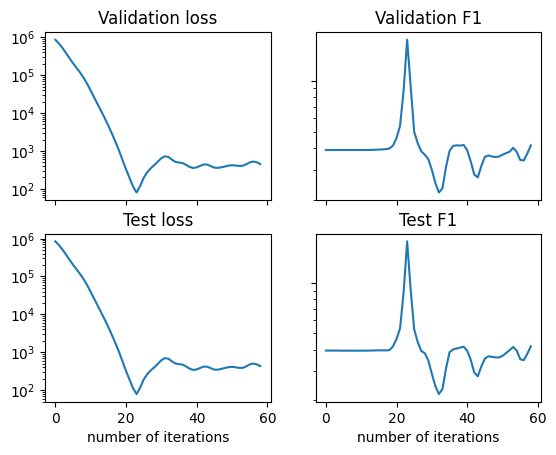

In [4]:
import matplotlib.pyplot as plt
import numpy as np
val_losses = np.load('plot_data/val_loss.npy')
val_f1s = np.load('plot_data/val_f1.npy')
test_losses = np.load('plot_data/test_loss.npy')
test_f1s = np.load('plot_data/test_f1.npy')
fig, axs = plt.subplots(2,2)
axs[0,0].plot(val_losses)
axs[0,0].set_title("Validation loss")
axs[0, 0].set_yscale('log')
axs[0,1].plot(val_f1s)
axs[0,1].set_title("Validation F1")
axs[0, 1].set_yscale('log')
axs[1,0].plot(test_losses)
axs[1,0].set_title("Test loss")
axs[1, 0].set_yscale('log')
axs[1,1].plot(test_f1s)
axs[1,1].set_title("Test F1")
axs[1, 1].set_yscale('log')
for ax in axs.flat:
    ax.set(xlabel='number of iterations')
for ax in axs.flat:
    ax.label_outer()